# 习题一

<center><font face="楷书"，size=8>Author:孟群康</font></center>
<center><font face="楷书"，size=8>Student_number:2022202020095</font></center>

## 一、题干

分别使用梯形公式，Simpson公式，复合梯形公式$(\epsilon=1e-7)$，复合Simpson公式$(\epsilon=1e-7)$四种方法计算积分$$\int_0^\pi sinxdx\,.$$并比较误差

首先根据定积分公式可以算出，本题的解析精确解为$-cos(\pi)-(-cos(0))=2$，用于后续的误差比较

## 二、具体实现

### 2.1 一般梯形公式法（包括梯形法和复合梯形法）

梯形公式法需要将积分空间划分为$n$个子区间，每个子区间的长度为$h = \dfrac{\pi}{n}$，则对于第$i$个子区间$[x_{i-1},x_{i}]$，其中$x_i=i\times h$,可以用梯形的面积来近似表示原函数在该积分区间内的积分值，即：

$$
\int_{x_{i-1}}^{x_i} \sin(x) dx \approx \dfrac{\sin(x_{i-1}) + \sin(x_i)}{2} \cdot h
$$

因此，整个积分的近似值可以表示为：

$$
\int_0^\pi \sin(x) dx \approx \sum_{i=1}^n \dfrac{\sin(x_{i-1}) + \sin(x_i)}{2} \cdot h
$$

使用python对上述算法进行实现，过程比较简单：

In [1]:
import math

# Define a function using the trapezoidal rule for approximating sin(x)
def trapezoidal_rule_sin(n):
    # Calculate the width of each trapezoid using the number of intervals specified by n.
    h = math.pi / n 
    # Add the values of sin(0) and sin(pi) together to account for the endpoints of the interval.
    approx = (math.sin(0) + math.sin(math.pi)) / 2  
    # For the remaining intervals, calculate the value of sin at the middle point.
    # Add these up to the approximation we've made so far.
    for i in range(1, n):
        x = i * h
        approx += math.sin(x)
    # Multiply the resulting sum by the width of each trapezoid and return it.
    # This gives us our estimated area under the curve.
    approx *= h
    return approx



可以通过调用 trapezoidal_rule_sin 函数并传入所需的步长 $n$ 值来获得近似值。步长为2时，为普通的梯形法，则结果如下：

In [2]:
result = trapezoidal_rule_sin(2)
error = result-2
relative_error = error/2 if error/2>0 else -error/2
print("counting result is",result) 
print("error is",error)
print("relative_error is",relative_error)

counting result is 1.5707963267948966
error is -0.42920367320510344
relative_error is 0.21460183660255172


步长为 $\dfrac{1}{\epsilon}$ 时，为复合梯形法：

In [3]:
result = trapezoidal_rule_sin(int(1e7))
error = result-2
relative_error = error/2 if error/2>0 else -error/2
print("counting result is",result) 
print("error is",error)
print("relative_error is",relative_error)

counting result is 1.9999999999998086
error is -1.91402449445377e-13
relative_error is 9.57012247226885e-14


误差跟步长相关，因此可以画出步长和误差之间的关系图

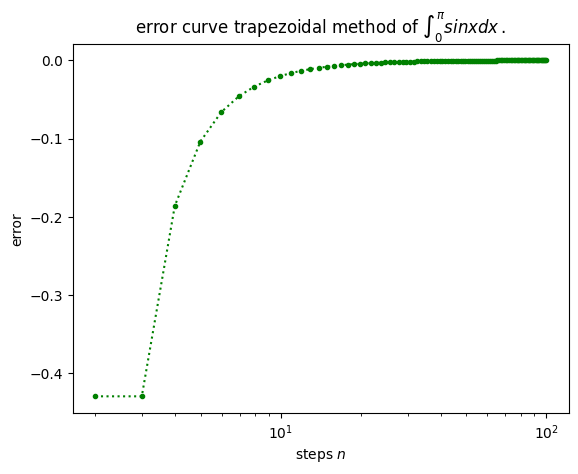

In [4]:
import matplotlib.pyplot as plt
import numpy as np

n=np.linspace(2,100,100)
error = []
for item in n:
    error.append(trapezoidal_rule_sin(int(item))-2)

plt.semilogx(n,error,linewidth =1.5, color='green', linestyle='dotted',marker='.')

plt.xlabel("steps $n$")
plt.ylabel("error")
plt.title(r"error curve trapezoidal method of $\int_0^\pi sinxdx\,.$")
plt.show()

### 2.2 Simpson公式法

Simpson公式法与梯形法最大的区别是拟合函数的选取不同，梯形法可以视为Simpson公式拟合的一次方法，而Simpson公式利用每个小区间的中心点和前后两个区间中心点的值做二次函数逼近，然后再计算二次函数的面积作为积分近似值。用公式表达如下：$$\int_{x_{i-1}}^{x_i} f(x)dx \approx \dfrac{h}{3}(f(x_{i-1})+4f(x_i)+f(x_{i+1}))$$其中，$x_i$是第$i$个小块的中心点，$f(x)$是在$x$处的函数值。对于边缘的两个小块，只能用梯形公式来进行数值积分的近似计算。

In [5]:
import math

def simpson_rule_sin(n):
    h = math.pi / n
    approx = math.sin(0) + math.sin(math.pi)  # add boundaries
    for i in range(1, n):  # iterate over inner segments
        x = i * h
        if i % 2 == 0:
            approx += 2*math.sin(x)
        else:
            approx += 4*math.sin(x)
    approx *= h / 3
    return approx


可以通过调用 simpson_rule_sin 函数并传入所需的步长 $n$ 值来获得近似值。步长为1时，为普通的simpson法，则结果如下：

In [6]:
result = simpson_rule_sin(2)
error = result-2
relative_error = error/2 if error/2>0 else -error/2
print("counting result is",result) 
print("error is",error)
print("relative_error is",relative_error)

counting result is 2.0943951023931953
error is 0.09439510239319526
relative_error is 0.04719755119659763


步长为 $\dfrac{1}{\epsilon}$ 时，为复合simpson法，则结果如下：

In [7]:
result = simpson_rule_sin(int(1e7))
error = result-2
relative_error = error/2 if error/2>0 else -error/2
print("counting result is",result) 
print("error is",error)
print("relative_error is",relative_error)

counting result is 2.0000000000000164
error is 1.6431300764452317e-14
relative_error is 8.215650382226158e-15


误差跟步长相关，因此可以画出步长和误差之间的关系图

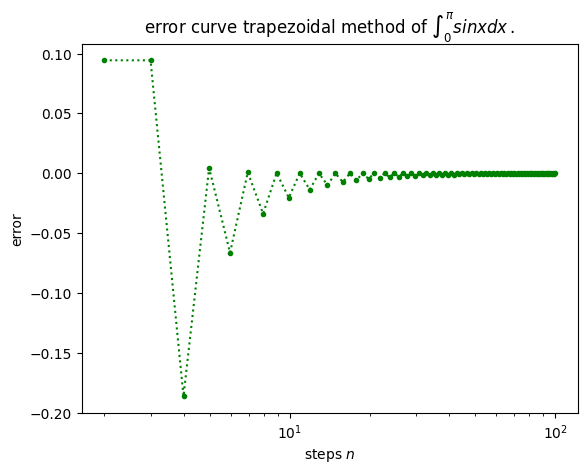

In [8]:
import matplotlib.pyplot as plt
import numpy as np

n=np.linspace(2,100,100)
error = []
for item in n:
    error.append(simpson_rule_sin(int(item))-2)

plt.semilogx(n,error,linewidth =1.5, color='green', linestyle='dotted',marker='.')

plt.xlabel("steps $n$")
plt.ylabel("error")
plt.title(r"error curve trapezoidal method of $\int_0^\pi sinxdx\,.$")
plt.show()